## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

%matplotlib inline

In [ ]:
df = pd.read_csv('aptos.csv')
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: Tamanho do apartamento em metros 
-   Valor: Preço do apartamento (variável alvo)
-   Quartos: Quantidade de quartos que o apartamento possui
-   Vagas: Quantidade de vagas no estacionamento
-   Reformado: Se o apartamento é reformado ou não (0, 1 = Sim, Não)
-   Bairro: Bairro onde está localizado o apartamento

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Quanto maior o tamanho, número de vagas no estacionamento e número de quartos, mais caro
2.  O fato de o apartamento estar ou não reformado não tem tanta influência no valor dele

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

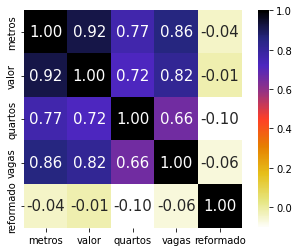

In [ ]:
corr_matx = df.corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15}, cmap='CMRmap_r')

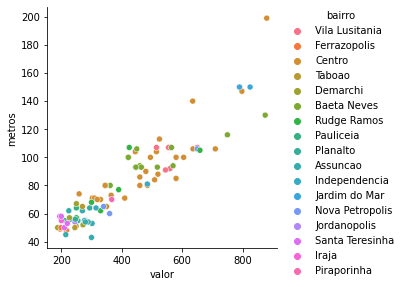

In [ ]:
sns.pairplot(df, hue='bairro', height=4,  x_vars='valor', y_vars = 'metros')
plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    Porque foram fornecidos dados para o aprendizado de máquina

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear
2. Rede Perceptron

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [268]:
X = df[['metros','quartos', 'vagas']]
Y = df['valor']

In [269]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [270]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_treino, Y_treino)

LinearRegression()

In [271]:
y_pred = linear_model.predict(X_teste)
print("Valores preditos usando 30% dos dados do DF: {}".format(y_pred))

Valores preditos usando 30% dos dados do DF: [ 406.13129575  599.35066584  295.43713341  453.70045223  546.91658894
  430.39641805  218.01343572  482.83049495  212.18742718  354.65830698
  482.83049495  235.49146136  317.05558097  354.65830698  241.3174699
  252.96948699  481.86940683  477.00448641  624.34028663  247.14347844
 1122.19768763  359.5232274   482.83049495  829.93617229  558.56860603
  218.01343572  287.92553825  407.09238388  299.57755534  804.22205301]


In [291]:
print("MAE: %.2f" % mean_absolute_error(Y_teste, y_pred))
print("RMSE: %.2f " % np.sqrt(mean_squared_error(Y_teste, y_pred)))
print("R2-score: %.2f" % r2_score(y_pred , Y_teste) )

MAE: 84.43
RMSE: 113.62 
R2-score: 0.45


### Algoritmo 2

In [276]:
import tensorflow as tf
from tensorflow import keras

In [318]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=2, input_shape=[3])
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [319]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'mse')

In [ ]:
epochs_hist = model.fit(X_treino, Y_treino, epochs=200)

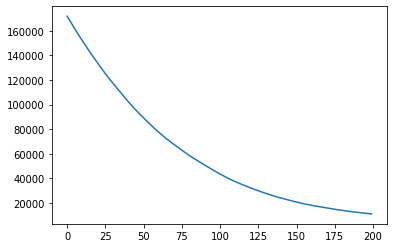

In [321]:
history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo 1 | algoritmo 2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algoritmo de rede neural perceptron, pois a quantidade de erros foi menor

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [322]:
metros = 65
quartos = 2
vagas = 2

revenue = model.predict([[metros, quartos, vagas]])

print('Um apartamento de {0} m2 com {1} quartos, {2} vagas, reformado no Centro vale aproximadamente R$ {3:.3f}'.format(metros, quartos, vagas, revenue[0,0]))


Um apartamento de 65 m2 com 2 quartos, 2 vagas, reformado no Centro vale aproximadamente R$ 311.081


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, porque os modelos desenvolvidos demonstraram uma boa acurácia nas predições

**Pergunta**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Pesquisar mais profundamente os parâmetros dos algoritmos para otimizar os códigos e melhorar as predições